In [3]:
import visualize_background as vb
import visualize_foreground as vf
import visualize_rhs as vr
import os
import matplotlib.pyplot as plt

import h5py

R_SUN = 6.957e10

def read_hdf5_write_text(hdf5_file_path, text_file_path):
    with h5py.File(hdf5_file_path, 'r') as file:
        with open(text_file_path, 'w') as text_file:
            # Iterate through groups in the HDF5 file
            for group_name in file.keys():
                group = file[group_name]
                text_file.write(f"{group_name}\n")
                text_file.write("-" * len(group_name) + "\n")

                # Iterate through datasets in the group
                for ds_name in group.keys():
                    data = group[ds_name][()]
                    text_file.write(f"{ds_name}: {data}\n")

                text_file.write("\n")  # Add a newline for separation between groups

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [47]:
DATA_FOLDER = "/mn/stornext/d10/data/tabjone/data/"
RUN_NAME = "new_test15/"
SAVE_FOLDER = "new_test15/"

/net/hume.uio.no/uio/hume/student-u58/tabjone/anelastic_mhd_solver/visualisation/visualize_background.py:38: RuntimeWarning: invalid value encountered in divide
  solar_S['g'] = -G*solar_S['M']/((solar_S['r_over_R']*R_sun)**2)
/net/hume.uio.no/uio/hume/student-u58/tabjone/anelastic_mhd_solver/visualisation/visualize_background.py:40: RuntimeWarning: divide by zero encountered in divide
  var['H'] = var['p0']/(var['rho0']*var['g'])


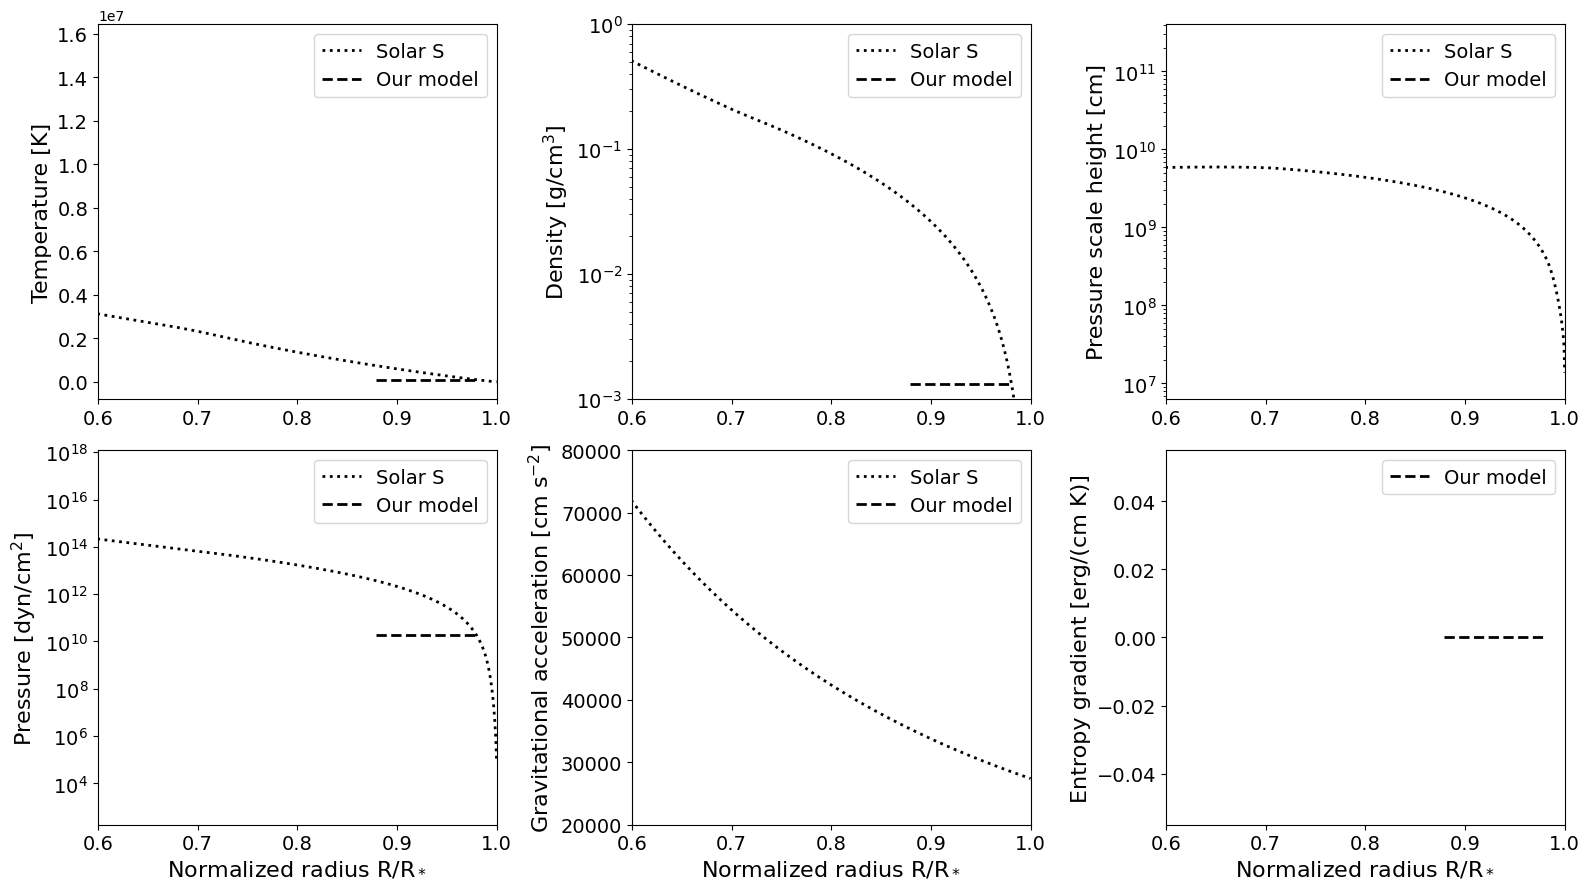

In [48]:
# Create save folder if it does not exist
if not os.path.exists(SAVE_FOLDER):
    os.makedirs(SAVE_FOLDER)

vb.plot_background(DATA_FOLDER, RUN_NAME, SAVE_FOLDER+"background.pdf")

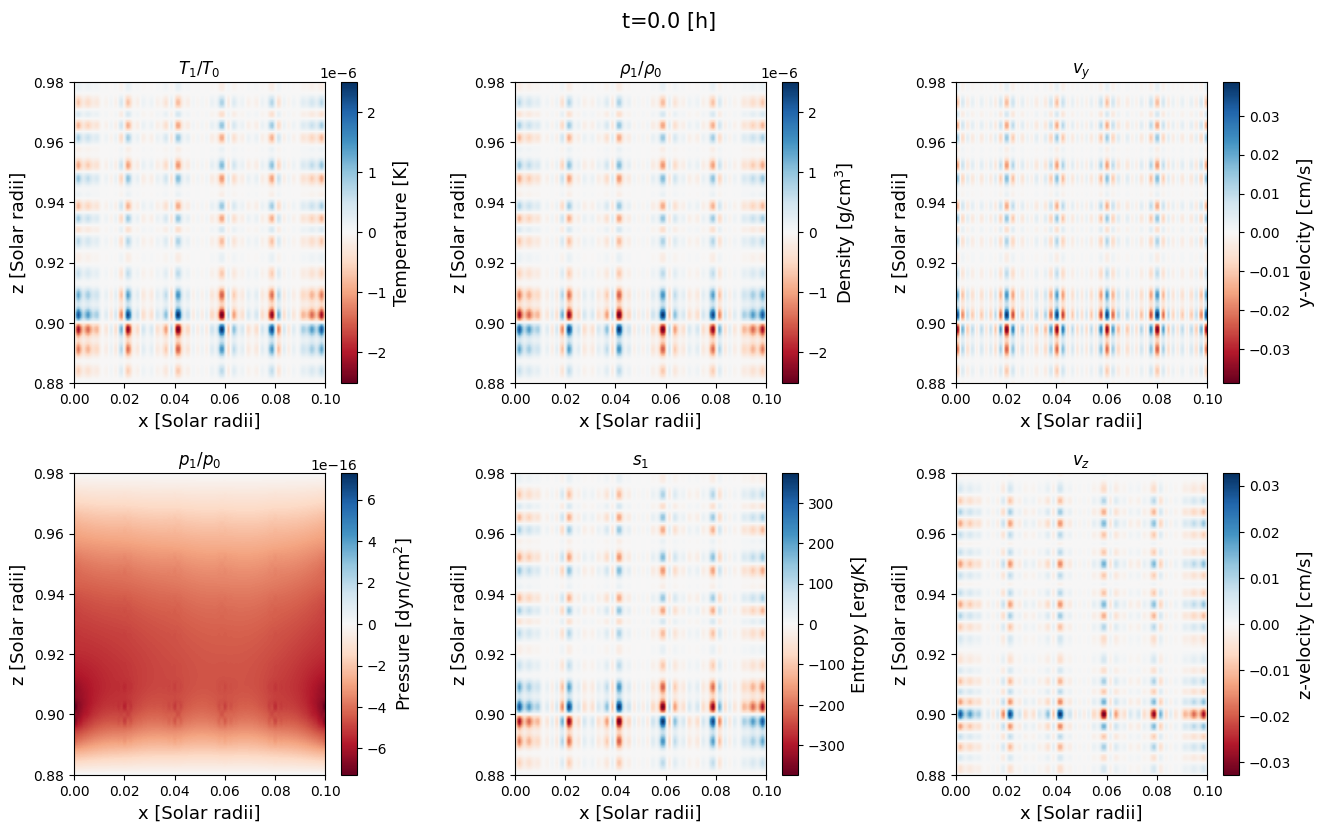

In [50]:

vf_class = vf.Visualize_Foreground(DATA_FOLDER+RUN_NAME, delta=False)
vf_class.norm = vf.TwoSlopeNorm
vf_class.plot_params['T1'] = (False, None, None, "Temperature [K]")
vf_class.plot_params['rho1'] = (False, None, None, r"Density [g/cm$^3$]")
vf_class.plot_params['p1'] = (False, None, None, r"Pressure [dyn/cm$^2$]")
vf_class.plot_params['s1'] = (False, None, None, "Entropy [erg/K]")
vf_class.plot_all(plt.figure(figsize=(16,9)), 15)

#vf_class.animate_all(save=True, save_name=SAVE_FOLDER+"foreground.mp4", fps=1, save_interval=1)

In [22]:
vf_class.plot_v_of_t()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/mn/stornext/d10/data/tabjone/data/test_9/{i}.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [68]:
n_procs = vf.read_mpi_info(DATA_FOLDER+RUN_NAME+"mpi_info.h5")
vr.animate_all(DATA_FOLDER+RUN_NAME, SAVE_FOLDER+"rhs.mp4", fps=2, save_interval=1)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/mn/stornext/d10/data/tabjone/data/new_test3/0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Error in callback <function _draw_all_if_interactive at 0x7f021b9caee0> (for post_execute):


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/mn/stornext/d10/data/tabjone/data/new_test3/0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

<Figure size 1600x900 with 0 Axes>

In [77]:
read_hdf5_write_text(DATA_FOLDER+RUN_NAME+"info.h5", SAVE_FOLDER+"info.txt")

In [89]:
0.4*0.6

0.24

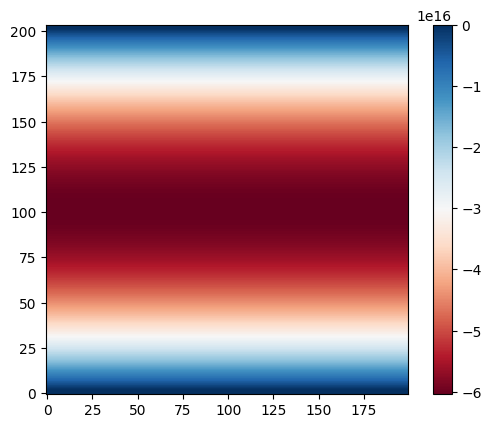

In [37]:
vars, info = vf.read_fg_mpi(1,1,DATA_FOLDER+RUN_NAME)
plt.imshow(vars['p1'], origin='lower', cmap="RdBu")
plt.colorbar()

In [168]:
import numpy as np
vz_max = np.max([np.max(vars['vz']), np.abs(np.min(vars['vz']))])
vy_max = np.max([np.max(vars['vy']), np.abs(np.min(vars['vy']))])
dy = info['dy']
dz = info['dz']

dt = 0.5 * 0.1 / (vz_max / dz + vy_max / dy)
dt

0.4993574601842863

In [169]:
dy, dz

(array(1161435.72621035), array(1159693.2822137))

In [122]:
np.where(vars['vy']>1e3)

(array([  78,   78,   78, ..., 1001, 1002, 1003]),
 array([835, 836, 837, ...,  15,  15,  15]))

In [47]:
bg, info = vf.read_bg_mpi(2, DATA_FOLDER+RUN_NAME)

In [48]:
np.where((np.roll(bg['r'],-1)[:-1]-bg['r'][:-1])/R_SUN < 0)

(array([], dtype=int64),)

In [29]:
bg['r'][223]/R_SUN

0.9006532663316583

In [56]:
((np.roll(bg['r'],-1) - bg['r']))[:-1]-34959798.99497986

array([ 0.00000000e+00, -7.62939453e-06, -7.62939453e-06,  0.00000000e+00,
       -7.62939453e-06, -7.62939453e-06,  0.00000000e+00, -7.62939453e-06,
       -7.62939453e-06,  0.00000000e+00, -7.62939453e-06, -7.62939453e-06,
        0.00000000e+00, -7.62939453e-06, -7.62939453e-06,  0.00000000e+00,
       -7.62939453e-06,  0.00000000e+00, -7.62939453e-06, -7.62939453e-06,
        0.00000000e+00, -7.62939453e-06, -7.62939453e-06,  0.00000000e+00,
       -7.62939453e-06, -7.62939453e-06,  0.00000000e+00, -7.62939453e-06,
       -7.62939453e-06,  0.00000000e+00, -7.62939453e-06, -7.62939453e-06,
        0.00000000e+00, -7.62939453e-06, -7.62939453e-06,  0.00000000e+00,
       -7.62939453e-06, -7.62939453e-06,  0.00000000e+00, -7.62939453e-06,
       -7.62939453e-06,  0.00000000e+00, -7.62939453e-06,  0.00000000e+00,
       -7.62939453e-06, -7.62939453e-06,  0.00000000e+00, -7.62939453e-06,
       -7.62939453e-06,  0.00000000e+00, -7.62939453e-06, -7.62939453e-06,
        0.00000000e+00, -

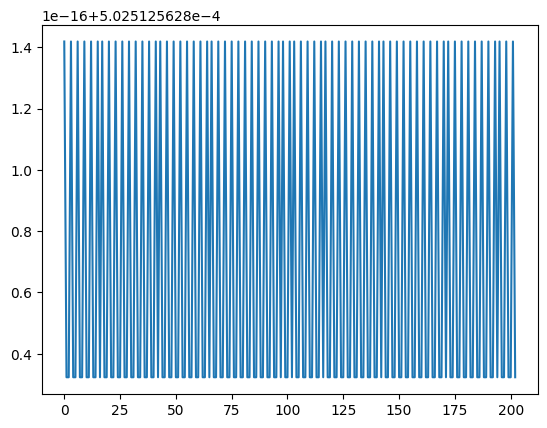

In [49]:
R_SUN = 6.957e10
import numpy as np
import matplotlib.pyplot as plt

R_START = 0.87
R_END   = 0.97


plt.plot(np.arange(len((np.roll(bg['r'],-1)[:-1]-bg['r'][:-1]))), (np.roll(bg['r'],-1)[:-1] - bg['r'][:-1])/R_SUN)

In [149]:
600*6000 - 4000*4000

-12400000